# Building a Sentiment Analysis of Tweets 
## Background
Since Iran’s Foreign Minister tweeted that Iran was providing medical aid to Lebanon, PITAPOLICY conducted a twitter sentiment analysis of Iran’s Foreign Minister Javed Zarif in the midst of Lebanon’s tragic, non-nuclear explosion to review official leaders’ responses on social media regarding aid to Lebanon. Below are sample results of his 200 most recent tweets. Although mostly positive or neutral with respect to the Beirut Explosion in expressing humanitarian solidarity, the negative tweets reference discussion on deteriorating relations with the U.S. and hopes for reinitiating the Joint Comprehensive Plan of Action, JCPOA, regarding Iran’s previous nonproliferation agreement. In 2016, Donald Tr ump’s administration removed the U.S. from this peaceful measure towards nuclear containment. 

## Goal: Use Clustering Techniques to Review Sentiment of Tweets
Work to tune a variety of models before choosing what you consider to be the best performer.

## Research Question: How can @PITAPOLICY use Latent Semantic Analysis and clustering techniques to segment a controversial political figure's tweets to understand where he is most polarizing?

## Methodology: 

* 1: Select 200 tweets, download and read into JSON. Save to directory on GitHub. Upload for use by reading back from JSON.
* 2: Clean tweets to review for words, topics, and sentiment. Remove puncuation, unusual characters, and focus on english by removing Farsi script. Although farsi_itertools is available to sort through second language, reserve this practice after using on this sample data set of 200 tweets. 
* 3: Break tweets down into a matrix of vectors through TFIDF function. 
* 4: Conduct topic modeling by using two unsupervised learning methods: Latent Direllect Association and Non-negative Matrix Factorization. 
* 5: We use a Latent Semantic Analsys model used to compare how similar the tweets (as vectors) are to one another in the dataset since that is unlabeled. Use vocabulary based on Textblob library, which includes its own biases, to measure 'polarity', 'subjectivity', 'posivity', 'negativity', and 'neutral'. Split tweets into training and test data sets to see how similar his tweets are to another--we are looking for content consistency. 
* 6: Compare results to select preferred model and discuss in conclusion. Recommend next steps.  

## Summary of Results:
We see that Javed Zarif has 1584269 followers.

As mentioned earlier, this Twitter account’s sample (@Jzarif) of 200 tweets reflects mostly positive tweets as shown. (http://www.pitapolicy.com/twitter-sentiment-analysis-of-iranian-foreign-minister-javed-zarif/) We again see it in the more recent graph shown in green representing mostly positive tweets during crisis. Approximately 75 percent of the tweets are positive, thus 25 percent are neutral.


After completing TFIDF, we compiled Analysis I, where we constructed an LSA model to identify semantic analysis. We see that there's little difference between the train and test sets of LSA samples. The two darker magenta boxes in the upper left quadrants for both 'train_lsa' and 'test_lsa' sets show that those classes of vectors most resemble each other semantically, regaring word frequency and placement in relation to other associated words. As such, PITAPOLICY concludes that the Twitter user, Javed Zarif, is consistent about his messages.

We measured both ‘subjectivity’ and ‘polarity’ and see that Javed’s tweets concentrate between -0.2 and .4 on the ‘polarity’ and skew positively.

These were the top 10 hashtags and themes trending in Washington, DC at that time:
* Biden 
* Lebanon 
* Hiroshima 
* #BB22
* #FOURTHCOUNTDOWN 
* The NRA 
* Pence 
* Lakers 
* Letitia James 
* Independence Day
 
In Analysis II: again we relied on TFIDF to perform 'topic modeling' where we constructed both the LDA and NNMF models. As unsupervised models, PITAPOLICY is feeding what we see in the tweets and infer the number of topics (k) from our corpus, or body of vectorized tweets. Essentially, we may contrast the LDA and NNMF models' respective results with each other.  

The NNMF model shows that the following topics surfaced after grabbing the feature names of the columns: 
    * Covid19',
    *'global',
    *'iran',
    *'jcpoa',
    *'people',
    *'realdonaldtrump',
    *'today',
    *'world'

 

## Conclusion
Based on our results, we opted for NNMF model over LDA because the resulting topics reflect the general global concerns reported in the news: Covid19 pandemic, the breakdown of the nuclear agreement with Iran (JCPOA), and Donald Trump's response to Iran's foreign policies. 

The complex models show a suggested slice of which topics could be grouped in the corpus. However, topic modeling in machine learning may benefit from domain expertise, e.g. knowledge of linguistics (both English and Farsi) and/or the political science and regional background of contemporary Iranian foreign policy. As such, PITAPOLICY represents both areas of domain expertise and will better apply those in a future running of this model by improving the 'stop_words' list and adding Farsi terms. PITAPOLICY will have a larger, and more robust, corpus to review once the langauge analysis expands into accounting for Farsi. Next time, PITAPOLICY will download the farsi_itertools library to translate Farsi into English text. 

Regarding more unsupervised techniques, like clustering: we could employ'K-means', 'DBSAN', and 'T-SNE'. However, these additional unsupervised methods focus primarily on the 'counts' of words. Clustering techniques do not involve the complexity of words that are associated with other words that show up in relation to other words closely associated in meaning. In fact, the clustering methods do not account for how words are physically placed together but may have opposite meaning. In contrast, LDA and NNMF incorporate mathematical formula that consider how a word co-associates with other groups of words for each 'document' based not just on frequency, but on placement. For example, PITAPOLICY looked at the probability of word 'w' occurring in topic 'k' across each document (columns of vectors). That is the added advantage of using a matrix of vectors that serve as the basic unit for measurement (rather than just word counts) to account for content and contextual sophisitication. 

In future, we will again use TFIDF to compare topic modeling results using Latent Dirichlect Allocation and Non-negative Matrix Formation (NNMF) over a concatentated sample of Zarif's tweets from another month following another political controversy. Based on that analysis, our audience will be more prepared to take this analysis and compare to other politically controversial leaders to systematically observer to what extent polarizing content is used within the grouping of political leaders. From here, PITAPOLICY can then make inferences and rank tweets from selected leaders and place them on a spectrum relative to one another. 

In [4]:
!pip install tweepy
#https://github.com/RaRe-Technologies/gensim/issues/2000

In [ ]:
!pip install tweetutilities

In [ ]:
!pip install geopy

In [ ]:
!pip install textblob

In [ ]:
!pip install preprocessor

In [ ]:
!pip install gensim

In [187]:
import tweepy 
from textblob import TextBlob
import re
from wordcloud import WordCloud
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

import gensim 
from gensim.models import Word2Vec
from gensim.models import word2vec

import nltk
from nltk.corpus import stopwords
from collections import Counter

import folium

In [272]:
df_from_jsonlines = pd.read_json("https://raw.githubusercontent.com/pitaconsumer/Capstone-5/master/corpus.jsonlines", lines=True)

In [273]:
df_from_jsonlines 

,Tweets,tweets_fixed
0,"Thanks to @SecPompeo, we now know criteria for...","Thanks to @SecPompeo, we now know criteria for..."
1,.@SecPompeo ‘s lawless bullying leaves US isol...,.@SecPompeo ‘s lawless bullying leaves US isol...
2,Very productive mtg w/ IAEA @rafaelmgrossi\n\n...,Very productive mtg w/ IAEA @rafaelmgrossi\n\n...
3,Outlaw @SecPompeo has no qualms about violatin...,Outlaw @SecPompeo has no qualms about violatin...
4,My fifth and concluding online discussion of t...,My fifth and concluding online discussion of t...
...,...,...
195,Our response to US EconomicTerrorism &amp; bla...,Our response to US EconomicTerrorism &amp; bla...
196,Subjecting construction workers to EconomicTer...,Subjecting construction workers to EconomicTer...
197,Returned from Geneva where I met with Russian ...,Returned from Geneva where I met with Russian ...
198,"Contrary to its deceptive claims, new US regul...","Contrary to its deceptive claims, new US regul..."


In [188]:
# from secrets import consumer_key,consumer_secret
#Need the API
    #consumer_key = ""
    #consumer_secret = ""

consumer_key = 'R8y38TnjdzbUMhXmiqrdOlFNo'
consumer_secret = '0SHVRVqighg3nbvU72303AVCNmyue6usBukhB7xiUZlL5wo3nE' 

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

In [189]:
#Extract 200 Tweets from the Twitter User
zarif_tweets = api.user_timeline(screen_name = 'JZarif', count = 500, 
                                 lang ='en', tweet_mode = 'extended')

#Show the 10 most recent tweets
print("Show the 10 most recent tweets: \n")
i =1
for tweet in zarif_tweets[0:9]:
    print (str(i) +') '+ tweet.full_text + '\n')
    i = i + 1

Show the 10 most recent tweets: 

1) Thanks to @SecPompeo, we now know criteria for a country to be removed from—or included in—State Dept's terror list: 

Relations with Israel.

World's No.1 nuclear threat, rights violator, illegal occupier &amp; terror entity

How can the world STILL take US foreign policy seriously? https://t.co/TR4NVWdKCy

2) .@SecPompeo ‘s lawless bullying leaves US isolated again:

While US prevented a Sec. Council debate about its unlawful notification on Friday, members in today's meeting on ME refuted U.S.’ attempt as null and void.

Time for @realDonaldTrump to stop listening to novice bullies. https://t.co/nHrRUzlj7N

3) Very productive mtg w/ IAEA @rafaelmgrossi

Iran has been fully transparent: over 92 percent of IAEA total comparable global inspections were carried out in Iran.

Some are intent to torpedo transparency thru pressure to reopen closed matters. 
 
We want normal relations w/ IAEA. https://t.co/t9vnwHGAsk

4) Outlaw @SecPompeo has no qualms a

In [190]:
#Create a dataframe with a column and label column as 'Tweets'
import pandas as pd
df = pd.DataFrame([tweet.full_text for tweet in zarif_tweets], columns = ['Tweets'])
df.head(10)

,Tweets
0,"Thanks to @SecPompeo, we now know criteria for..."
1,.@SecPompeo ‘s lawless bullying leaves US isol...
2,Very productive mtg w/ IAEA @rafaelmgrossi\n\n...
3,Outlaw @SecPompeo has no qualms about violatin...
4,My fifth and concluding online discussion of t...
5,In their own words: https://t.co/fFNjWj5xQa
6,Factsheet on the illegitimate and felonious U....
7,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...
8,"67 years ago today, US/UK tried to suffocate t..."
9,I'll be delivering the fourth of five online t...


In [7]:
#Insert additional columns: 'retweet_count', 'user'
zarif_tweets_user = api.get_user('jzarif')

In [8]:
zarif_tweets_user.status.text

'In their own words: https://t.co/fFNjWj5xQa'

In [9]:
#get description for column
zarif_tweets_user.description

'Foreign Minister of Islamic Republic of Iran'

In [10]:
#followers as a column
zarif_tweets_user.followers

<bound method User.followers of User(_api=<tweepy.api.API object at 0x11f678190>, _json={'id': 47813521, 'id_str': '47813521', 'name': 'Javad Zarif', 'screen_name': 'JZarif', 'location': 'Tehran, Iran', 'profile_location': None, 'description': 'Foreign Minister of Islamic Republic of Iran', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 1584269, 'friends_count': 10, 'listed_count': 4061, 'created_at': 'Wed Jun 17 01:54:58 +0000 2009', 'favourites_count': 6, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 955, 'lang': None, 'status': {'created_at': 'Sat Aug 22 16:52:37 +0000 2020', 'id': 1297215107626414082, 'id_str': '1297215107626414082', 'text': 'In their own words: https://t.co/fFNjWj5xQa', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1297214866076438533, 'id_str': '1297214866076438533', 'indices': [20, 43], 'media_url'

In [11]:
#Number of Followers
zarif_tweets_user.followers_count

1584269

In [12]:
#Number of Friends
zarif_tweets_user.friends_count

10

In [13]:
followers =[]

In [14]:
cursor = tweepy.Cursor(api.followers, screen_name ='zarif_tweets_user')
cursor

In [15]:
cursor = tweepy.Cursor(api.followers, screen_name = 'JZarif', count= 200) #Default is groups of 20.
for account in cursor.items(10):
    followers.append(account.screen_name)
    print(followers)

['mohadesehzaman1']
['mohadesehzaman1', 'Erphanov']
['mohadesehzaman1', 'Erphanov', 'semohossei_ni']
['mohadesehzaman1', 'Erphanov', 'semohossei_ni', 'reza35939797']
['mohadesehzaman1', 'Erphanov', 'semohossei_ni', 'reza35939797', 'bosaif_qtr']
['mohadesehzaman1', 'Erphanov', 'semohossei_ni', 'reza35939797', 'bosaif_qtr', 'Dihahs10']
['mohadesehzaman1', 'Erphanov', 'semohossei_ni', 'reza35939797', 'bosaif_qtr', 'Dihahs10', 'uLsMJ4qTVBAvzcW']
['mohadesehzaman1', 'Erphanov', 'semohossei_ni', 'reza35939797', 'bosaif_qtr', 'Dihahs10', 'uLsMJ4qTVBAvzcW', 'khande_bazar_2']
['mohadesehzaman1', 'Erphanov', 'semohossei_ni', 'reza35939797', 'bosaif_qtr', 'Dihahs10', 'uLsMJ4qTVBAvzcW', 'khande_bazar_2', 'Pooria33088439']
['mohadesehzaman1', 'Erphanov', 'semohossei_ni', 'reza35939797', 'bosaif_qtr', 'Dihahs10', 'uLsMJ4qTVBAvzcW', 'khande_bazar_2', 'Pooria33088439', 'Behzad5050']


In [16]:
print("Followers:", ''.join(sorted(followers, key=lambda s:s.lower())))
#normalize by number of followers based on RT's

Followers: Behzad5050bosaif_qtrDihahs10Erphanovkhande_bazar_2mohadesehzaman1Pooria33088439reza35939797semohossei_niuLsMJ4qTVBAvzcW


In [17]:
#Determine who Javed Zarif follows: 'friends'
friends = []
cursor = tweepy.Cursor(api.friends, screen_name = 'JZarif')
for friend in cursor.items(10):
    friends.append(friend.screen_name)
print (friends)

['IPIS_Iran', 'TakhtRavanchi', 'IranForMin', 'SAMOUSAVI9', 'IRIMFA_EN', 'IRIMFA_AR', 'ebtekarm', 'araghchi', 'khamenei_ir', 'HassanRouhani']


In [18]:
print('Friends:', ''.join(sorted(friends, key =  lambda s: s.lower())))
#Label as 'friends'

Friends: araghchiebtekarmHassanRouhaniIPIS_IranIranForMinIRIMFA_ARIRIMFA_ENkhamenei_irSAMOUSAVI9TakhtRavanchi


## Clean Text

In [191]:
#Create a function to clean tweets
    
def clean_text(text):
    text = re.sub(r'@{[A-Za-z0-9]+', '', text)  #Checking for '@' and all upper case letters following
    text = re.sub(r'#', '', text) #Remove hashtag
    text = re.sub(r'RT[\s] +','', text)  #Remove Retweets
    text = re.sub(r'https?:\/\/\S+','',text) #Remove the hyperlink
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'\n', ' ', text, flags=re.MULTILINE)
    return text

#Cleaning the text
df['tweets_fixed'] = df['Tweets'].apply(clean_text)
df

,Tweets,tweets_fixed
0,"Thanks to @SecPompeo, we now know criteria for...","Thanks to @SecPompeo, we now know criteria for..."
1,.@SecPompeo ‘s lawless bullying leaves US isol...,.@SecPompeo ‘s lawless bullying leaves US isol...
2,Very productive mtg w/ IAEA @rafaelmgrossi\n\n...,Very productive mtg w/ IAEA @rafaelmgrossi Ir...
3,Outlaw @SecPompeo has no qualms about violatin...,Outlaw @SecPompeo has no qualms about violatin...
4,My fifth and concluding online discussion of t...,My fifth and concluding online discussion of t...
...,...,...
195,Our response to US #EconomicTerrorism &amp; bl...,Our response to US EconomicTerrorism blackmai...
196,Subjecting construction workers to #EconomicTe...,Subjecting construction workers to EconomicTer...
197,Returned from Geneva where I met with Russian ...,Returned from Geneva where I met with Russian ...
198,"Contrary to its deceptive claims, new US regul...","Contrary to its deceptive claims, new US regul..."


In [192]:
#Select tweets for review
df['tweets_fixed'] = df['Tweets'].apply(lambda x: x if type(x) == str else '')

# Exploratory Data Analysis: Word Cloud

### Figures 1: Wordclouds

<function matplotlib.pyplot.show(*args, **kw)>

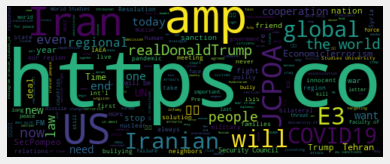

In [193]:
#Plot the Word Cloud
all_words = ''.join([twts for twts in df['tweets_fixed']])
WordCloud = WordCloud(width = 500, height= 200, random_state = 21, 
                      max_font_size =150).generate(all_words)
plt.imshow(WordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show

## Term Frequency Inverse Document Frequency: Constructing Vectors from TFIDF
TF = (Number of times term t appears in a document)/(Number of terms in the document)
IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
TF-IDF = TF*IDF

# PAUSE AND SKIP

In [274]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# TF-IDF feature matrix: 
                            #tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
vectors_tfidf = tfidf_vectorizer.fit_transform(df['tweets_fixed'])
vectors_tfidf
#Matrix is 200 by 701

<200x701 sparse matrix of type '<class 'numpy.float64'>'
	with 2655 stored elements in Compressed Sparse Row format>

# UNPAUSE 
RAN LDA AND NNMF FROM SCIKIT LEARN INSTRUCTIONS:
https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

In [275]:
df['tweets_fixed']

0      Thanks to @SecPompeo, we now know criteria for...
1      .@SecPompeo ‘s lawless bullying leaves US isol...
2      Very productive mtg w/ IAEA @rafaelmgrossi\n\n...
3      Outlaw @SecPompeo has no qualms about violatin...
4      My fifth and concluding online discussion of t...
                             ...                        
195    Our response to US #EconomicTerrorism &amp; bl...
196    Subjecting construction workers to #EconomicTe...
197    Returned from Geneva where I met with Russian ...
198    Contrary to its deceptive claims, new US regul...
199    Met with Yemen’s Mohammad Abdul-Salam in Tehra...
Name: tweets_fixed, Length: 200, dtype: object

## Measuring Javed Zarif's Polarity & Subjectivity

In [281]:
#Create a function to get 'subjectivity' and 'polarity'

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['subjectivity'] = df['tweets_fixed'].apply(get_subjectivity)
df['polarity'] = df['tweets_fixed'].apply(get_polarity)

#Show the new dataframe
df

,Tweets,tweets_fixed,subjectivity,polarity
0,"Thanks to @SecPompeo, we now know criteria for...","Thanks to @SecPompeo, we now know criteria for...",0.372917,-0.189583
1,.@SecPompeo ‘s lawless bullying leaves US isol...,.@SecPompeo ‘s lawless bullying leaves US isol...,0.600000,-0.100000
2,Very productive mtg w/ IAEA @rafaelmgrossi\n\n...,Very productive mtg w/ IAEA @rafaelmgrossi\n\n...,0.360000,0.050000
3,Outlaw @SecPompeo has no qualms about violatin...,Outlaw @SecPompeo has no qualms about violatin...,0.375000,0.275000
4,My fifth and concluding online discussion of t...,My fifth and concluding online discussion of t...,0.500000,0.136364
...,...,...,...,...
195,Our response to US #EconomicTerrorism &amp; bl...,Our response to US #EconomicTerrorism &amp; bl...,0.416667,0.216667
196,Subjecting construction workers to #EconomicTe...,Subjecting construction workers to #EconomicTe...,0.533333,-0.272222
197,Returned from Geneva where I met with Russian ...,Returned from Geneva where I met with Russian ...,0.515000,-0.247500
198,"Contrary to its deceptive claims, new US regul...","Contrary to its deceptive claims, new US regul...",0.484848,0.045455


In [282]:
#Create a function to denote the positive, negative, and neutral analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    if score == 0:
        return 'Neutral'
    if score > 0:
        return 'Positive'
    
df['Analysis'] = df['polarity'].apply(getAnalysis)

#Show df
df

,Tweets,tweets_fixed,subjectivity,polarity,Analysis
0,"Thanks to @SecPompeo, we now know criteria for...","Thanks to @SecPompeo, we now know criteria for...",0.372917,-0.189583,Negative
1,.@SecPompeo ‘s lawless bullying leaves US isol...,.@SecPompeo ‘s lawless bullying leaves US isol...,0.600000,-0.100000,Negative
2,Very productive mtg w/ IAEA @rafaelmgrossi\n\n...,Very productive mtg w/ IAEA @rafaelmgrossi\n\n...,0.360000,0.050000,Positive
3,Outlaw @SecPompeo has no qualms about violatin...,Outlaw @SecPompeo has no qualms about violatin...,0.375000,0.275000,Positive
4,My fifth and concluding online discussion of t...,My fifth and concluding online discussion of t...,0.500000,0.136364,Positive
...,...,...,...,...,...
195,Our response to US #EconomicTerrorism &amp; bl...,Our response to US #EconomicTerrorism &amp; bl...,0.416667,0.216667,Positive
196,Subjecting construction workers to #EconomicTe...,Subjecting construction workers to #EconomicTe...,0.533333,-0.272222,Negative
197,Returned from Geneva where I met with Russian ...,Returned from Geneva where I met with Russian ...,0.515000,-0.247500,Negative
198,"Contrary to its deceptive claims, new US regul...","Contrary to its deceptive claims, new US regul...",0.484848,0.045455,Positive


In [289]:
#Print all the positive tweets
j =1
sorted_DF = df.sort_values(by = 'polarity')
for i in range(0, sorted_DF.shape[0]):
    if (sorted_DF['Analysis'][i] == 'Positive'):
        print(str(j) + sorted_DF['Tweets'][i])
        print()  #print a new line
        j = j+1
      

1Very productive mtg w/ IAEA @rafaelmgrossi

Iran has been fully transparent: over 92 percent of IAEA total comparable global inspections were carried out in Iran.

Some are intent to torpedo transparency thru pressure to reopen closed matters. 
 
We want normal relations w/ IAEA. https://t.co/t9vnwHGAsk

2Outlaw @SecPompeo has no qualms about violating his own country's laws.

Standing next to World's #1 nuclear threat, he declares his desire to flood our region with even more US weapons—all while trying to impede lawful normalization of Iran's defense 
cooperation with the world. https://t.co/dXdJBZgAt5

3My fifth and concluding online discussion of the World in Transition.

Today, Aug 24, From 12:30 to 13:15 UTC;

Topic: Iran and the World in Transition;

Faculty of World Studies, University of Tehran.

Live Instagram @iranian_studies_ut https://t.co/is8ClvsrKM

4In their own words: https://t.co/fFNjWj5xQa

5I'll be delivering the fourth of five online talks at Faculty of World Stud

In [26]:
#Let's see Negative Tweets in new df
j = 1
sorted_DF = df.sort_values(by = 'polarity')
for i in range(0, sorted_DF.shape[0]):
    if (sorted_DF['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sorted_DF['Tweets'][i])
        print()  #print a new line
        j = j+1

1)67 years ago today, US/UK tried to suffocate the Iranian people’s demand for dignity in a coup overthrowing their elected government. 

Since 1979, the US has desperately tried to resuscitate the past. Yet it keeps getting humiliated by the Iranian people. 

Time to change tack?

2)"Pirates of the Caribbean" have their own judges and courts now.

Sadly for them, stolen booty wasn't Iran's. Fuel was sold F.O.B. Persian Gulf. Ship and flag weren't ours either.

Hollow, cheap propaganda doesn’t deflect from miserable failure of US diplomatic malpractice at UN.

3)US is so desperate to show support for its struggle to illegally extend arms restrictions on Iran that it clings to the personal position of GCC SG—obtained thru coercion—as regional consensus.

All knew that most in the region—even in GCC—do NOT subscribe to this.

Here's proof: 

4)I just published Using Security Council to Destroy Security Council 

5)75 years ago today, the US gained the infamy of becoming the 1st and ONLY 

## Sentiment Analysis  

### Visualize Tweets by Minister Zarif

### Figure 2: Sentiment Analysis Regarding Subjectivity

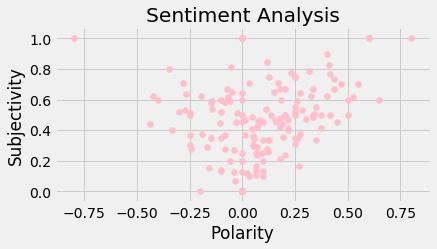

In [284]:
#Plot the polarity and subjectivity
plt.figure(figsize=(6,3)) 
for i in range(0, sorted_DF.shape[0]): 
    plt.scatter(df['polarity'][i], df['subjectivity'][i], color = 'Pink') 

plt.title ('Sentiment Analysis' ) 
plt.xlabel ('Polarity') 
plt.ylabel ('Subjectivity')     
plt.show()
    

In [285]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

#round ((ptweets.shape[0] / df.shape[0])*100,1)

print(ptweets)

2      Very productive mtg w/ IAEA @rafaelmgrossi\n\n...
3      Outlaw @SecPompeo has no qualms about violatin...
4      My fifth and concluding online discussion of t...
5            In their own words: https://t.co/fFNjWj5xQa
9      I'll be delivering the fourth of five online t...
                             ...                        
193    To my EU/E3 Colleagues \n1."Fully upheld commi...
194    Pleased to be in Turkey, attending 24th minist...
195    Our response to US #EconomicTerrorism &amp; bl...
198    Contrary to its deceptive claims, new US regul...
199    Met with Yemen’s Mohammad Abdul-Salam in Tehra...
Name: Tweets, Length: 98, dtype: object


In [286]:
round ((ptweets.shape[0] / df.shape[0])*100,1)

49.0

In [287]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

#round ((ptweets.shape[0] / df.shape[0])*100,1)

print(ntweets)

0      Thanks to @SecPompeo, we now know criteria for...
1      .@SecPompeo ‘s lawless bullying leaves US isol...
8      67 years ago today, US/UK tried to suffocate t...
11     "Pirates of the Caribbean" have their own judg...
14     US is so desperate to show support for its str...
15     I just published Using Security Council to Des...
19     75 years ago today, the US gained the infamy o...
34     As we mark #EidAlAdha (Feast of the Sacrifice)...
42     Productive talks in Baghdad with PM @MAKadhimi...
44     25 yrs ago today, #SrebrenicaGenocide began as...
46     Don't believe the hype: Iran triggered #JCPOA ...
50     The US isn't merely violating JCPOA and bullyi...
52     .@SecPompeo is so desperate to mislead the wor...
53     E3 must stop public face-saving &amp; muster t...
55     Iran &amp; Russia are "determined to deal with...
57     Productive talks with my friend @MevlutCavusog...
58     International Criminal COURT now blackmailed b...
60     US has tried to heighten

In [31]:
round ((ntweets.shape[0] / df.shape[0])*100,1)

23.5

### Figure 3: Sentiment Analysis - Polarity

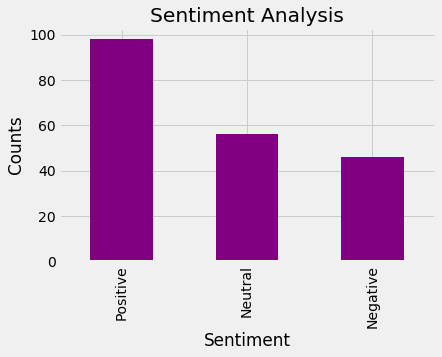

In [288]:
#Show the value counts
df['Analysis'].value_counts()

#Plot and show
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel ('Counts')
df['Analysis'].value_counts().plot(kind='bar', color = 'Purple')
plt.show()

In [34]:
#Review subjectivity and polarity of Zarif
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['tweets_fixed'].apply(pol)
df['subjectivity'] = df['tweets_fixed'].apply(sub)
df

,Tweets,tweets_fixed,subjectivity,polarity,Analysis
0,In their own words:,In their own words:,1.000000,0.600000,Positive
1,Factsheet on the illegitimate and felonious U....,Factsheet on the illegitimate and felonious U....,0.000000,0.000000,Neutral
2,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,أبارك للأخ و الصدیق الحمیم معالي السيد بدربن‌ح...,0.000000,0.000000,Neutral
3,"67 years ago today, US/UK tried to suffocate t...","67 years ago today, US/UK tried to suffocate t...",0.625000,-0.425000,Negative
4,I'll be delivering the fourth of five online t...,I'll be delivering the fourth of five online t...,0.250000,0.068182,Positive
...,...,...,...,...,...
195,2500 young entrepreneurs have turned an old bu...,2500 young entrepreneurs have turned an old bu...,0.500000,-0.133333,Negative
196,The imperative now is to end the incursion int...,The imperative now is to end the incursion int...,0.600000,-0.200000,Negative
197,Grateful to PM @ImranKhanPTI for his efforts t...,Grateful to PM @ImranKhanPTI for his efforts t...,0.375000,-0.125000,Negative
198,Iran's Leader has long made it abundantly clea...,Iran's Leader has long made it abundantly clea...,0.391667,0.025000,Positive


# Analysis II: Semantic Analysis
## TFIDF
Use Term Frequency-Inverse Document Frequency for Semantic Analysis and future unsupervised techniques, like clustering.

### Top Words

In [290]:
from sklearn.model_selection import train_test_split

In [291]:
# Need vectors for LSA, LDA, NNMF topic modeling. 
#Substitute 'emma_pars' with our text of fixed tweets: 'tweets_fixed'
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test = train_test_split(df['tweets_fixed'], test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the tweets
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


In [292]:
#Applying the vectorizer
tweets_fixed_tfidf = vectorizer.fit_transform(df['tweets_fixed'])
print("Number of features: %d" % tweets_fixed_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(tweets_fixed_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]

#A list of dictionaries, one per paragraph
tfidf_by_tweet = [{} for _ in range(0,n)]

#List of features
terms = vectorizer.get_feature_names()

#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_by_tweet[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[1])
print('Tf_idf vector:', tfidf_by_tweet[1])

Number of features: 700
Original sentence: .@SecPompeo ‘s lawless bullying leaves US isolated again:

While US prevented a Sec. Council debate about its unlawful notification on Friday, members in today's meeting on ME refuted U.S.’ attempt as null and void.

Time for @realDonaldTrump to stop listening to novice bullies. https://t.co/nHrRUzlj7N
Tf_idf vector: {'shortly': 0.193376478113503, 'june': 0.193376478113503, 'violations': 0.17439713249643954, 'e3': 0.49918464838040927, 'drm': 0.1826878649608537, 'triggered': 0.1826878649608537, 'believe': 0.1826878649608537, 'don': 0.15255835671218307, '2020': 0.17439713249643954, 'jcpoa': 0.11174023531086319, 'july': 0.193376478113503, '10': 0.193376478113503, '2018': 0.580129434340509, '17': 0.193376478113503, 'iran': 0.07687952565897188, 'amp': 0.1570621955842775}


In [293]:
tweets_fixed_tfidf.shape

(200, 700)

#### Observation: We have 700 features in our TFIDF matrix.  

In [296]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
#data_cv = cv.fit_transform(data_clean.transcript)
df_cv = cv.fit_transform(df.tweets_fixed)

#data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
df_dtm = pd.DataFrame(df_cv.toarray(), columns=cv.get_feature_names())

#data_dtm.index = data_clean.index
df_dtm.index = df.tweets_fixed.index

#data_dtm
df_dtm

000  06p1lmmwgf  0jjb9jaljw  0usmqgpnln  10  1000s  104  11  12  1230  \
0      0           0           0           0   0      0    0   0   0     0   
1      0           0           0           0   0      0    0   0   0     0   
2      0           0           0           0   0      0    0   0   0     0   
3      0           0           0           0   0      0    0   0   0     0   
4      0           0           0           0   0      0    0   0   1     0   
..   ...         ...         ...         ...  ..    ...  ...  ..  ..   ...   
195    0           0           0           0   0      0    0   0   0     0   
196    0           0           0           0   0      0    0   0   0     0   
197    0           0           0           0   0      0    0   0   0     0   
198    0           0           0           0   0      0    0   0   0     0   
199    0           0           0           0   0      0    0   0   0     0   

     13  15  153h4wxlhd  16  1600  17  170zm17ihm  18  19  1906  1947  1979  \
0     0   0           0   0     0   0           0   0   0     0     0     0   
1     0   0           0   0     0   0           0   0   0     0     0     0   
2     0   0           0   0     0   0           0   0   0     0     0     0   
3     0   0           0   0     0   0           0   0   0     0     0     0   
4     1   1           0   0     0   0           0   0   0     0     0     0   
..   ..  ..         ...  ..   ...  ..         ...  ..  ..   ...   ...   ...   
195   0   0           0   0     0   0           0   0   0     0     0     0   
196   0   0           0   0     0   0           0   0   0     0     0     0   
197   0   0           0   0     0   0           0   0   0     0     0     0   
198   0   0           0   0     0   0           0   0   0     0     0     0   
199   0   0           0   0     0   0           0   0   0     0     0     0   

     1982  19th  1ipd6joyjg  1st  1tezul0cdg  20  2016  2017  2018  2019  \
0       0     0           0    0           0   0     0     0     0     0   
1       0     0           0    0           0   0     0     0     0     0   
2       0     0           0    0           0   0     0     0     0     0   
3       0     0           0    0           0   0     0     0     0     0   
4       0     0           0    0           0   0     0     0     0     0   
..    ...   ...         ...  ...         ...  ..   ...   ...   ...   ...   
195     0     0           0    0           0   0     0     0     0     0   
196     0     0           0    0           0   0     0     0     0     0   
197     0     0           0    0           0   0     0     0     0     0   
198     0     0           0    0           0   0     0     0     0     0   
199     0     0           0    0           0   0     0     0     0     0   

     2020  21  2231  24  24th  25  27  280  29dwpdiqmq  2cbrfnxsqs  2nd  \
0       0   0     0   0     0   0   0    0           0           0    0   
1       0   0     0   0     0   0   0    0           0           0    0   
2       0   0     0   0     0   0   0    0           0           0    0   
3       0   0     0   0     0   0   0    0           0           0    0   
4       0   0     0   1     0   0   0    0           0           0    0   
..    ...  ..   ...  ..   ...  ..  ..  ...         ...         ...  ...   
195     0   0     0   0     0   0   0    0           0           0    0   
196     0   0     0   0     0   0   0    0           0           0    0   
197     0   0     0   0     0   0   0    0           0           0    0   
198     0   0     0   0     0   0   0    0           0           0    0   
199     0   0     0   0     0   0   0    0           0           0    0   

     2voxw2wy9d  2xgwg8xxh8  30  36  3kjekvtr5w  3rd  40  41st  4b9lggbuko  \
0             0           0   0   0           0    0   0     0           0   
1             0           0   0   0           0    0   0     0           0   
2             0           0   0   0           0    0   0     0         

In [295]:
print(tweets_fixed_tfidf)

  (0, 456)	0.20684908129619503
  (0, 237)	0.23078836458204613
  (0, 52)	0.11194897228654431
  (0, 288)	0.23895291823489845
  (0, 590)	0.248609535605538
  (0, 425)	0.23078836458204613
  (0, 651)	0.3355646616279202
  (0, 327)	0.248609535605538
  (0, 497)	0.22371590651280693
  (0, 582)	0.5208565601801087
  (0, 560)	0.23895291823489845
  (0, 148)	0.248609535605538
  (0, 528)	0.20684908129619503
  (0, 587)	0.248609535605538
  (1, 364)	0.29923774080570176
  (1, 565)	0.2149323987206307
  (1, 486)	0.19622261679214067
  (1, 593)	0.21953436098118068
  (1, 71)	0.29923774080570176
  (1, 384)	0.25938605089344124
  (1, 594)	0.18212958653531947
  (1, 241)	0.29923774080570176
  (1, 610)	0.29923774080570176
  (1, 145)	0.22453697876839915
  (1, 526)	0.29923774080570176
  :	:
  (198, 320)	0.24405993999710085
  (198, 383)	0.3000171327925628
  (198, 419)	0.2557133572683152
  (198, 451)	0.21814389267504822
  (198, 318)	0.22979730994626246
  (198, 634)	0.24962143201830495
  (198, 528)	0.24962143201830495
  (

## LSA Model
### Apply LSA Model to Training Set
We are applying the Latent Semantic Analysis, instead of the Vector Space Model, to conduct a tweet similarity analysis because our body of 200 tweets is long. Also, LSA recognizes the occurence of synonyms rather than counting them as different from each other. In addition to context, LSA considers how a word can be used for slightly different meanings. The goal is to identify clusters of terms that reflect topics appearing in Zarif's tweets.

**Note: LSA is the process of applying feature dimension reduction to a tf-idf term-document matrix.
Since we don't want to mean-center our variables, which means we lose sparsity, we will use another dimension reduction method aside from Pincipal Compenent Analysis. This is called Singular Value Decomposition (SVD). 

#### Dimension reduction: Singular Value Decomposition (SVD)
We have our vectors, with one vector per tweet. Will use a dimension reduction technique called Singular Value Decomposition (SVD) function from sklearn rather than PCA because we don't want to mean-center our variables (and thus lose sparsity).

In [297]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 704 features to 130. 
 ## We subsitute 'svd' as our pca for dimension reduction.
svd = TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))

# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

print(X_train_lsa.shape)

variance_explained = svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of tweets (paragraphs) our solution considers similar, 
#for the first five identified topics
#paras_by_component = pd.DataFrame(X_train_lsa,index=X_train)
tweets_by_component = pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    #print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])
    #print(tweets_by_component.loc[:,i].sort_values(ascending=False)[0:10])


(120, 120)
Percent variance captured by all components: 100.0
Component 0:
Component 1:
Component 2:
Component 3:
Component 4:


In [298]:
#print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])
print(tweets_by_component.loc[:,i].sort_values(ascending=False)[0:10])

tweets_fixed
The int'l community in general—and UN Security Council in particular—face an important decision: Do we maintain respect for rule of law, or do we return to law of the jungle? \n\nMy address before UNSC on Res. 2231 \n\nPersian: https://t.co/QJx8XE1nJ3\nEnglish: https://t.co/daZPnF2Voj https://t.co/pAUAeTSxjs          0.441282
I just published Using Security Council to Destroy Security Council https://t.co/q0LA5U6Vrn                                                                                                                                                                                                                                    0.317247
Aparat\nPersian:\nhttps://t.co/4b9lGgBuko\n\nEnglish:\nhttps://t.co/6VCv2ElR3i                                                                                                                                                                                                                                                 0.272910
Tho

In [299]:
print(X_train_lsa) # .shape is (120,120)

[[ 3.11378777e-01  4.10232568e-01  2.29312143e-01 ... -0.00000000e+00
  -0.00000000e+00  4.44671779e-40]
 [ 3.19195871e-01  2.58325770e-01 -8.15444788e-02 ... -9.55545814e-33
  -4.97120119e-37  6.94644028e-38]
 [ 1.61133579e-01 -1.17502343e-01 -9.69280539e-02 ... -1.42300285e-33
   2.04361987e-37 -4.63011776e-38]
 ...
 [ 6.84550924e-02 -1.03780576e-01 -6.41692959e-03 ...  7.56349531e-33
  -1.35101108e-37  1.53775657e-38]
 [ 1.51086341e-01 -1.48434839e-01 -1.31999605e-01 ... -3.78174766e-32
  -2.70202217e-37  1.09351578e-37]
 [ 2.80108205e-02 -3.71319770e-02  8.23940745e-03 ...  1.51269906e-32
   1.35101108e-37 -2.05034209e-38]]


In [50]:
print(X_train.values) #These are my tweets

['Instead of arrogant threats or hollow paper promises, E3/EU—and future INSTEX shareholder Sweden—should start with something very simple; a minimal human duty: \n\nAsk @molnlyckehc to SELL products enabling Iranian kids with EB to cover their wounds.\n \n EconomicTerrorism kills.'
 '在中国端午节来临前夕，很高兴同中国国务委员兼外长王毅举行视频会晤。我们就深化两国全面战略伙伴关系、推动25年双边合作计划、加强在国际事务中相互支持等议题达成共识。我们都重申对伊核协议、多边主义及国际法的支持，共同反对单边主义、反对削弱伊核协议。借此机会，要特别祝中国朋友们端午安康！'
 'E3 claims it has kept its obligations under JCPOA. \n\n✔️Reality Check:\n\n- Zero imports of Iranian oil\n- Embargoing of Iranian banks &amp; SWIFT disconnect\n- Non-implementation of Blocking Statute\n- Exodus of European firms in Iran\n- Failure to even sell "exempted" food/medicine'
 "2500 young entrepreneurs have turned an old building in Tehran into an innovation factory to develop cutting edge tech—gaming, nano medicine, AI, IoT.... \n\n.@realDonaldTrump 's EconomicTerrorism is out to block them and their ideas, but they're relentless in pursuit of dreams. 

In [51]:
print(len(X_train))

120


In [301]:
tweets_by_component.shape

(120, 120)

In [300]:
#Show the df
tweets_by_component.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
tweets_fixed,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Brian Hook has given our E3 #JCPOA partners a timely reminder, openly admitting that missile testing is NOT prohibited in Security Council Resolution 2231: \n\n""One of the deficiencies of the Iran nuclear deal is that it ENDED the prohibition on Iran's ballistic missile testing."" https://t.co/dPGW0OEuzt",0.311379,0.410233,0.229312,-1.315812e-16,0.070034,-0.110646,-0.106227,-0.161694,-0.028454,-0.067092,-8.587658e-17,0.045374,-0.030862,0.087778,-0.054020,-0.033943,-0.031137,0.053659,-0.076179,-0.029287,0.015316,-0.034573,0.020829,-0.076438,-0.047888,-0.075492,-0.040811,-0.017049,0.065767,0.065281,0.093407,0.018335,0.134902,0.128856,-0.112772,-0.033220,-0.029654,-0.077498,0.066908,0.000000e+00,0.125417,0.006280,-0.004971,0.089580,-0.007006,0.000000e+00,0.125508,0.000000e+00,-0.065483,-0.083874,-0.149630,-0.097102,-0.085906,0.104765,0.026403,-0.039221,-0.204949,0.007709,-0.139381,0.062636,-0.092645,-0.066005,0.031078,0.013773,0.108081,0.003265,0.051280,0.029656,0.030425,-0.066343,0.013033,0.026500,-0.071085,-0.013088,-0.133494,0.125377,0.000000e+00,0.112229,0.058480,-0.099560,0.156298,-0.079054,-0.045235,0.005229,-0.090165,-0.141285,0.021436,0.004601,-0.000000e+00,0.093082,0.106509,-0.078407,0.104813,-0.023766,0.231467,0.021297,-0.014614,0.057136,-0.076982,-0.017275,0.115573,-0.079090,0.046720,-0.060136,0.149755,-0.044006,-0.056500,0.002250,0.045954,3.033367e-15,-0.036865,0.021637,0.003738,-1.350781e-16,0.114259,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,4.446718e-40
Don't believe the hype: Iran triggered #JCPOA DRM on at least 6 occasions (in ref to U.S. AND E3 violations)\n\n16 Dec 2016 (U.S.)\n10 May 2018 (U.S.)\n17 June 2018 (U.S.)\n6 Nov 2018 (U.S. &amp; E3)\n8 May 2019 (U.S. &amp; E3)\n2 July 2020 (E3)\n\nI will be publishing all my letters shortly. https://t.co/153H4wXlhD,0.319196,0.258326,-0.081544,8.192216e-16,-0.318727,-0.078114,0.006446,0.031060,0.215835,-0.092537,-6.648159e-18,-0.002603,-0.089807,-0.021099,-0.036294,-0.008232,-0.064118,0.065087,-0.026234,-0.077256,-0.172538,0.095402,0.114576,-0.035759,0.046328,0.014879,-0.028861,-0.001574,-0.060553,-0.072931,-0.105055,-0.071543,-0.051996,-0.078994,-0.024856,0.029671,0.022291,-0.051040,-0.082137,-4.784763e-15,-0.107725,0.095754,0.005570,-0.013293,-0.045965,1.671412e-15,-0.003522,3.087492e-15,0.064645,-0.150301,-0.017359,-0.160682,-0.054322,-0.051313,-0.084620,0.006745,0.104142,0.150623,-0.136141,0.066768,-0.053739,-0.091440,-0.059989,0.291312,-0.127720,0.080094,0.073056,-0.027741,-0.033052,0.190855,0.046268,0.012113,0.011351,0.030057,0.011601,0.142344,1.873876e-15,0.090446,-0.103307,0.045013,-0.067337,0.024812,0.027357,-0.065742,0.008506,-0.060049,0.089871,0.102061,-7.714189e-15,0.031964,-0.061744,-0.175170,-0.103344,0.025518,-0.116043,-0.067041,0.110299,0.026171,0.089298,-0.099914,-0.049411,0.100021,0.068014,0.056114,0.045342,-0.007039,-0.058994,0.056752,0.112311,2.609698e-15,-0.030096,-0.060210,-0.036999,2.596975e-16,0.050526,1.868356e-33,1.067057e-32,-9.555458e-33,-4.971201e-37,6.946440e-38
"In Oman today, met with Canadian FM @FP_Champagne to discuss consular, technical &amp; legal cooperation among nations impacted by #PS752 tragedy. \n\nAgreed on continued exchanges between respective experts.\n\nPoliticization of this tragedy must be rejected. Focus on victims’ families. https://t.co/6QULuZhGcE",0.161134,-0.117502,-0.096928,1.304712e-16,0.042013,-0.077294,-0.116596,-0.058754,0.202514,-0.001780,-6.768160e-17,0.005474,-0.055156,-0.040046,-0.012104,0.0828

In [54]:
tweets_by_component.shape #Why dropped number of tweets from 200 to 120  b/c I split my data into train

(120, 120)

In [302]:
tfidf

<200x10 sparse matrix of type '<class 'numpy.float64'>'
	with 402 stored elements in Compressed Sparse Row format>

### Sentence similarity
We can also look at how similar various tweets are to one another. For example, here are the similarity scores (as a heatmap) of the first 10 tweets in the training set:

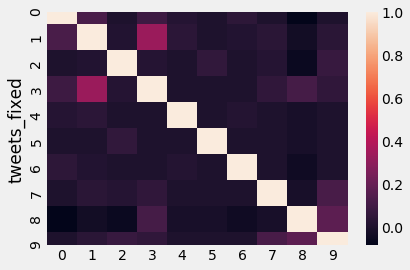

Key:
0 Brian Hook has given our E3 #JCPOA partners a timely reminder, openly admitting that missile testing is NOT prohibited in Security Council Resolution 2231: 

"One of the deficiencies of the Iran nuclear deal is that it ENDED the prohibition on Iran's ballistic missile testing." https://t.co/dPGW0OEuzt
1 Don't believe the hype: Iran triggered #JCPOA DRM on at least 6 occasions (in ref to U.S. AND E3 violations)

16 Dec 2016 (U.S.)
10 May 2018 (U.S.)
17 June 2018 (U.S.)
6 Nov 2018 (U.S. &amp; E3)
8 May 2019 (U.S. &amp; E3)
2 July 2020 (E3)

I will be publishing all my letters shortly. https://t.co/153H4wXlhD
2 In Oman today, met with Canadian FM @FP_Champagne to discuss consular, technical &amp; legal cooperation among nations impacted by #PS752 tragedy. 

Agreed on continued exchanges between respective experts.

Politicization of this tragedy must be rejected. Focus on victims’ families. https://t.co/6QULuZhGcE
3 Our response to US #EconomicTerrorism &amp; blackmail is opposite 

In [303]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)

#Only taking the first 10 tweets
sim_matrix = pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]

#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

### Apply LSA Model to Test Set 

In [304]:
# Run SVD on the test data, then project the test data.
X_test_lsa = lsa.fit_transform(X_test_tfidf)

In [305]:
X_test_tfidf

<80x700 sparse matrix of type '<class 'numpy.float64'>'
	with 965 stored elements in Compressed Sparse Row format>

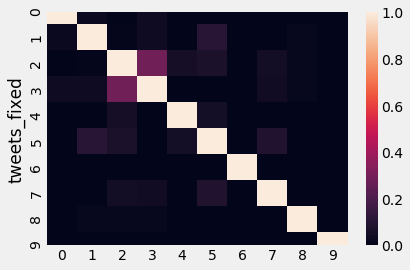

Key:
0 I'll be delivering the third of five online talks at Faculty of World Studies, University of Tehran, today, Aug 10, 12:30-13:15 UTC

Topic: Power Shifts and New Players in the Transitional Period

Live Instagram @iranian_studies_ut

Watch 2nd session @https://youtu.be/ZdcK0oRpjqk https://t.co/wiFBoOU3RM
1 Fruitful talks with FM Lavrov in Russia. 

Unlike others who embark on "defensive" warmongering 1000s of miles from their own shores, Iran and Russia have cooperated for peace in Syria and are now presenting important proposals for peace in the Persian Gulf.

Next stop: China https://t.co/yEYH5TojFm
2 In letter to counterparts @HassanRouhani informs how efforts to fight #COVID19 pandemic in Iran have been severely hampered by US sanctions, urging them to cease observing them: It is IMMORAL to let a bully kill innocents

Viruses recognize no politics or geography. Nor should we
3 #Covid19 ravages the world, sparing no nation.

Even the world's largest economy needs others to hel

In [306]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_test_lsa) * np.asmatrix(X_test_lsa).T)

#Only taking the first 10 tweets
sim_matrix = pd.DataFrame(similarity,index = X_test).iloc[0:10,0:10]

#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels = range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

In [61]:
#tweets_by_component
tweets_by_component

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
tweets_fixed,,,,,,,,,,,,,,,,,,,,,
"Instead of arrogant threats or hollow paper promises, E3/EU—and future INSTEX shareholder Sweden—should start with something very simple; a minimal human duty: \n\nAsk @molnlyckehc to SELL products enabling Iranian kids with EB to cover their wounds.\n \n EconomicTerrorism kills.",0.158729,0.146910,0.223442,-0.053740,-2.592020e-15,-0.026414,-0.035220,0.139369,-0.024169,-0.050668,...,-0.009018,0.025127,0.028544,0.014908,-0.000720,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-1.616776e-39
在中国端午节来临前夕，很高兴同中国国务委员兼外长王毅举行视频会晤。我们就深化两国全面战略伙伴关系、推动25年双边合作计划、加强在国际事务中相互支持等议题达成共识。我们都重申对伊核协议、多边主义及国际法的支持，共同反对单边主义、反对削弱伊核协议。借此机会，要特别祝中国朋友们端午安康！,0.186866,0.133070,-0.128702,0.015698,1.652333e-01,0.075030,0.051260,-0.143104,-0.003466,0.006857,...,-0.080381,0.157326,-0.006010,0.052458,0.032461,-9.182624e-18,-1.688501e-18,7.017010e-19,7.438881e-21,1.919380e-08
"E3 claims it has kept its obligations under JCPOA. \n\n✔️Reality Check:\n\n- Zero imports of Iranian oil\n- Embargoing of Iranian banks &amp; SWIFT disconnect\n- Non-implementation of Blocking Statute\n- Exodus of European firms in Iran\n- Failure to even sell ""exempted"" food/medicine",0.299632,0.261220,0.214776,-0.077691,-4.250254e-15,-0.042266,0.042884,0.254462,-0.137840,-0.225398,...,0.172511,-0.007147,0.010910,0.070137,0.031012,5.330996e-34,-2.488937e-33,6.306143e-33,1.531587e-36,5.792968e-39
"2500 young entrepreneurs have turned an old building in Tehran into an innovation factory to develop cutting edge tech—gaming, nano medicine, AI, IoT.... \n\n.@realDonaldTrump 's EconomicTerrorism is out to block them and their ideas, but they're relentless in pursuit of dreams.",0.100216,-0.016007,0.151610,0.006228,-7.493792e-15,-0.081334,0.077888,0.160729,-0.031232,-0.019694,...,-0.021442,-0.008236,-0.001748,-0.013579,-0.005000,-1.643452e-33,-5.796111e-33,4.725027e-33,1.205227e-35,4.890291e-41
We're closely engaged w/ @WHO to battle COVID19 in Iran &amp; ensure proper care for those infected\n\nStrict preventive measures—including screening of air travelers at departure gates—are being implemented\n\nGlobal &amp; regional coop imperative. We either win together or lose together.,0.343100,-0.196232,-0.057507,-0.086128,-8.649539e-16,-0.006974,0.009010,-0.192502,0.015763,-0.132779,...,-0.025244,0.006596,0.003242,-0.006172,-0.006681,-2.207812e-33,-3.179773e-33,-5.216332e-33,-2.339363e-36,9.856600e-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Those who muse about injecting disinfectant to “clean” the coronavirus, also argue that they are a “participant” in a UN Security Council Resolution endorsing a deal that they long ago ""ceased participating"" in. Their own words.\n\nIf only Kafka were around.",0.116326,0.090203,-0.116570,0.241905,4.561022e-14,0.479150,0.410563,0.029433,-0.011620,-0.092406,...,0.000622,0.199650,0.238857,-0.153888,-0.020054,7.903347e-33,-7.131160e-33,7.266862e-34,-2.586932e-36,-2.102729e-39
"Returned from Geneva where I met with Russian &amp; Turkish FMs, &amp; UN's GeirOPederson, on eve of inauguration of Syria Constitutional Committee. \n\nAfter years of devastating war, path to rule of law begins— thanks to Astana process.\n\nDifficult road ahead, but no other alternative.",0.275791,-0.164071,-0.227250,-0.043434,-5.157828e-15,-0.055454,-0.069634,0.124937,0.046001,0.196812,...,-0.043719,-0.086883,0.062000,-0.028997,-0.001583,1.371292e-32,4.522930e-33,6.214628e-33,-3.700297e-36,1.839888e-39
"On the sidelines of the @MunSecConf, my full interview with @RichardEngel of @NBCNews. \n\n""Bad advice to President Trump has led him to make the wrong decisions.""\n\nAnd thus,\n\n""The end of the United States in the region has already begun.”\n\n",0.081146,-0.063131,-0.039676,0.100260,6.877104e-15,0.073624,-0.213941,0.118070,-0.093419,0.064949,...,-0.040973,0.035668,-0.023101,0.036194,0.006363,6.469439e-33,-2.358852e-32,-3.600119e-33,-1

In [307]:
tweets_by_component.shape

(120, 120)

In [308]:
vocab2.shape

(2560,)

In [309]:
vocab2[60:1800]

array(['abdullah', 'abeshizo', 'abetting', ..., 'terrorist', 'terrorists',
       'terrorize'], dtype='<U28')

In [ ]:
# Link to Analysis II: Topic Modeling through unsupervised methods.